In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/TransferLearning
!ls

/content/gdrive/My Drive/TransferLearning
InceptionV3   testimg2.jpg  VGG16model94accuracy.h5  X_train.pickle
NASNetMobile  VGG16logs     VGG19logs		     Y_test.pickle
test.h5       VGG16logs1    X_test.pickle	     Y_train.pickle


In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
from keras.models import Sequential
from keras.layers import Activation, GlobalAveragePooling2D,Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import mobilenet_v2
from keras.layers import Input
import numpy as np
from keras import Model

Using TensorFlow backend.


In [0]:
tensorboard = TensorBoard(log_dir='./MobileNet_v2', histogram_freq=0,
                          write_graph=True, write_images=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [6]:
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
CLASSES = 4
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [0]:
for layer in base_model.layers:
    layer.trainable = False

In [0]:
import pickle

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'],
              )

In [12]:
#Fit the model
history = model.fit(X_train, Y_train,
batch_size=32,
epochs=20,
validation_data=(X_test,Y_test),
callbacks=[tensorboard])


Train on 1006 samples, validate on 607 samples


Epoch 1/20
1006/1006 [==============================] - 5s 5ms/step - loss: 1.2740 - accuracy: 0.4533 - val_loss: 1.6026 - val_accuracy: 0.2438

Epoch 2/20
1006/1006 [==============================] - 2s 2ms/step - loss: 0.7853 - accuracy: 0.6909 - val_loss: 1.5865 - val_accuracy: 0.3048
Epoch 3/20
1006/1006 [==============================] - 2s 2ms/step - loss: 0.6157 - accuracy: 0.7495 - val_loss: 1.5057 - val_accuracy: 0.3328
Epoch 4/20
1006/1006 [==============================] - 2s 2ms/step - loss: 0.5387 - accuracy: 0.7873 - val_loss: 1.5323 - val_accuracy: 0.3295
Epoch 5/20
1006/1006 [==============================] - 2s 2ms/step - loss: 0.4423 - accuracy: 0.8380 - val_loss: 1.5124 - val_accuracy: 0.3097
Epoch 6/20
1006/1006 [==============================] - 2s 2ms/step - loss: 0.4184 - accuracy: 0.8479 - val_loss: 1.4960 - val_accuracy: 0.3229
Epoch 7/20
1006/1006 [==============================] - 2s 2ms/step - loss: 0.3960 - 

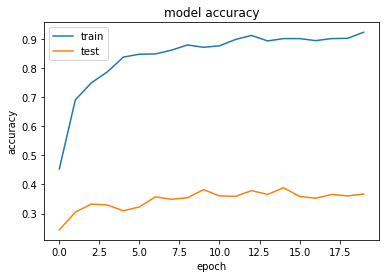

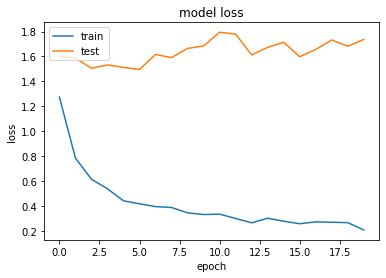

In [14]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#Score 
scores = model.evaluate(X_test, Y_test, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

607/607 [==============================] - 1s 1ms/step
Test loss: 1.7360232170959673
Test accuracy: 0.3673805594444275


In [17]:
 #precision    recall  f1-score   support
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_bool))

607/607 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.34      0.29      0.31       150
           1       0.34      0.31      0.32       150
           2       0.39      0.83      0.53       157
           3       0.50      0.03      0.05       150

    accuracy                           0.37       607
   macro avg       0.39      0.36      0.30       607
weighted avg       0.39      0.37      0.31       607



In [0]:
model.save("MobileNetV2accuracy36.h5")